<a href="https://colab.research.google.com/github/sanctuary929/CoinFlip/blob/master/CEG5304_24Spring_project1_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CEG5304 Project #1 for Master students

In this project, you are going to start an exciting journey to explore Deep Learning and Neural Networks by completing the following three tasks:

* **Task 1. Understanding and conducting convolution (8%).**
* **Task 2. Building and training a ResNet18 model (52%).**
* **Task 3. Exploring and explaining the trained model (40%).**

Before doing the project, please read the instructions carefully (failure to do so will be penalized):

1. Implement your codes **within** "TODO" and "END OF YOUR CODE", do **NOT** modify any codes outside the answer area;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed), and **runnable**;
3. Write your answers in the given markdown cells, keep your answers clear and concise;
4. Do submit your project on [Canvas](https://canvas.nus.edu.sg/) before the deadline: **5:59 pm (SGT), 1 March, 2024**;
5. Make sure that the **submitted notebooks have been run** and the **cell outputs are visible**.
6. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for cheating.

Note:

1. It is recommended to do model training on GPU, you may use [Colab](https://colab.google/) or [Kaggle](https://www.kaggle.com/) for free computing resources for faster training.
2. Since free computing resources accessible on [Colab](https://colab.google/) is limited for unsuscribed users for each day, it is recommended to debug on your CPU first.

## Task 1: Understanding and conducting convolution (8%)
**Subtasks**
1. Use numpy to conduct 2D standard convolution operation (4%).
2. Use numpy to conduct 2D dilated convolution operation (4%).

You may refer to *["A guide to convolution arithmetic for deeplearning"](https://arxiv.org/pdf/1603.07285.pdf)* for details of dilated convolution.

In this task, we follow the settings as in the paper:
* 2-D discrete convolutions,
* square inputs,
* square kernel size,
* same strides along both axes,
* same zero padding along both axes.

Score points:
1. The implementations are correct.
2. The implementation of dilated convolution makes use of the relationship between dilated convolution kernel and standard convolution kernel.

In [ ]:
import numpy as np

In [ ]:
def conv2d(inputs,kernels,padding=0, stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO: conduct convolution calculation based on given inputs, kernels,      #
    #       padding and stride values.                                           #
    ##############################################################################
    # your code

    # Get dimensions
    input_depth, input_height, input_width = inputs.shape
    num_kernels, kernel_depth, kernel_height, kernel_width = kernels.shape

    # Compute output dimensions
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1

    # Initialize output with zeros
    outputs = np.zeros((num_kernels, output_height, output_width))

    # Perform convolution
    for k in range(num_kernels):
        for i in range(0, input_height - kernel_height + 1, stride):
            for j in range(0, input_width - kernel_width + 1, stride):
                outputs[k, output_height - 1 - i // stride, j // stride] = np.sum(
                    inputs[:, i:i + kernel_height, j:j + kernel_width] * kernels[k]
                )


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [ ]:
def dilated_conv2d(inputs,kernels,dilation,padding=0,stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO: conduct dilated convolution calculation based on given inputs,       #
    #       kernels, padding and stride values.                                  #
    ##############################################################################
    # your code
    # Extract dimensions
    input_depth, input_height, input_width = inputs.shape
    num_kernels, kernel_depth, kernel_height, kernel_width = kernels.shape
    newkernel_size = dilation * (kernel_height - 1) + 1

    # Calculate output dimensions
    output_height = (input_height - newkernel_size) // stride + 1
    output_width = (input_width - newkernel_size) // stride + 1

    # Initialize output array
    outputs = np.zeros((num_kernels, output_height, output_width))

    # Perform dilated convolution
    for k in range(num_kernels):
        for i in range(0, input_height - newkernel_size + 1, stride):
            for j in range(0, input_width - newkernel_size + 1, stride):
                mylist = []
                for m in kernels[k]:
                    f = np.insert(m, 1, np.array([0, 0]), axis=1)
                    mylist.append(f)
                arr1 = np.array(mylist)

                ls = []
                for m in arr1:
                    q = np.insert(m, 1, np.array([0, 0, 0]), axis=0)
                    ls.append(q)
                arr7 = np.array(ls)

                outputs[k, output_width - 1 - i // stride, j // stride] = np.sum(
                    inputs[:, i:i + newkernel_size, j:j + newkernel_size] * arr7
                )

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [ ]:
np.random.seed(2024)
inputs = np.random.randint(0,3,size=(2,5,5))
kernels = np.random.randint(0,3,size=(3,2,2,2))
print(f"Inputs:\n{inputs}\n")
print(f"Kernels:\n{kernels}")

Inputs:
[[[0 2 0 0 0]
  [2 1 1 0 2]
  [2 0 1 0 1]
  [2 2 2 0 2]
  [2 1 2 2 0]]

 [[2 1 2 2 1]
  [1 1 2 0 1]
  [2 2 2 0 2]
  [0 2 1 2 2]
  [0 0 1 2 1]]]

Kernels:
[[[[0 0]
   [1 2]]

  [[2 0]
   [2 0]]]


 [[[1 1]
   [2 2]]

  [[0 0]
   [0 1]]]


 [[[1 0]
   [1 1]]

  [[1 1]
   [0 0]]]]


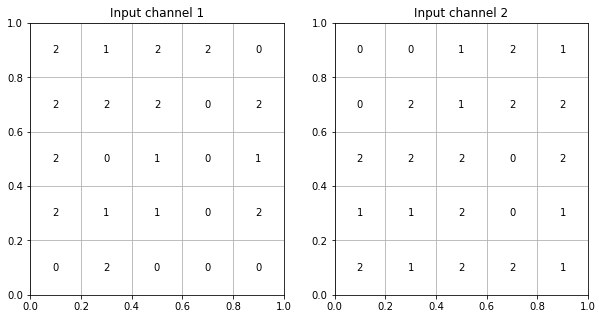

In [ ]:
# visualize inputs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(inputs.shape[0]):
    ax = fig.add_subplot(1, inputs.shape[0], i+1, xticks=[], yticks=[])
    ax.set_title('Input channel %s' % str(i+1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True)
    width = inputs[i].shape[0]
    height = inputs[i].shape[1]


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
    for x in range(width):
        for y in range(height):
            ax.annotate(str(inputs[i][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                        horizontalalignment='center',
                        verticalalignment='center')


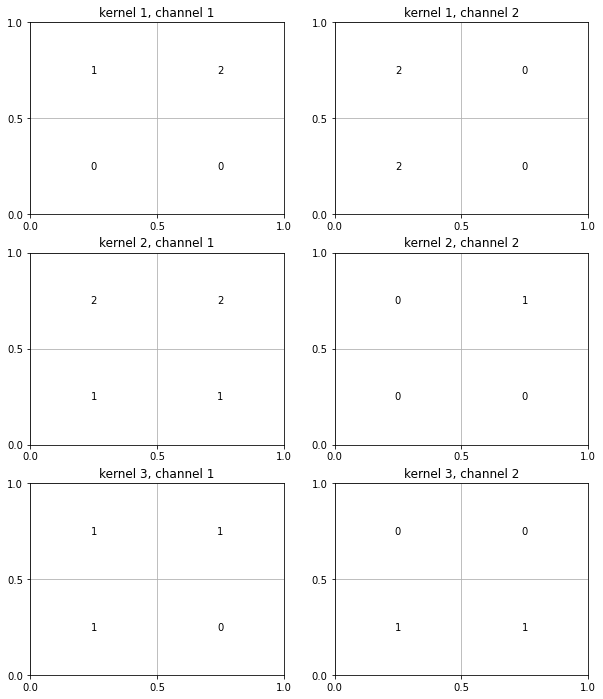

In [ ]:
# visualize kernels
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 12))
for i in range(kernels.shape[0]):
    for j in range(kernels.shape[1]):
        ax = fig.add_subplot(kernels.shape[0], kernels.shape[1], i*kernels.shape[1] + j+1, xticks=[], yticks=[])
        ax.set_title(f'kernel {str(i+1)}, channel {str(j+1)}')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(True)
        width = kernels[i][j].shape[0]
        height = kernels[i][j].shape[1]


        ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
        for x in range(width):
            for y in range(height):
                ax.annotate(str(kernels[i][j][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                            horizontalalignment='center',
                            verticalalignment='center')

In [ ]:
conv2d(inputs,kernels,stride=1)

array([[[ 4.,  9., 10., 10.],
        [10., 14.,  8.,  8.],
        [ 8.,  8.,  9.,  2.],
        [10.,  7.,  9.,  8.]],

       [[10., 11., 12.,  7.],
        [12., 10.,  7.,  7.],
        [ 9.,  6.,  3.,  6.],
        [ 9.,  8.,  2.,  5.]],

       [[ 7.,  8.,  9.,  6.],
        [10.,  8.,  5.,  4.],
        [ 6.,  5.,  4.,  2.],
        [ 6.,  7.,  5.,  5.]]])

In [ ]:
dilated_conv2d(inputs,kernels,dilation=2)

array([[[10.,  9.,  8.],
        [ 8.,  8., 12.],
        [12.,  6., 11.]],

       [[12.,  8.,  7.],
        [12.,  7., 13.],
        [ 8.,  2.,  6.]],

       [[10.,  5.,  7.],
        [ 9.,  4.,  8.],
        [ 7.,  5.,  5.]]])

## Task 2: Building and training a ResNet18 model (52%)
**Subtasks**
1. Figure out the ResNet18 model architecture and write down the dimension of features of each layer (4%).
2. Build a ResNet18 model by PyTorch (20%).
3. Complete the codes to evaluate and train the model. (10%)
4. Viusalize the training curves (2%).
5. Point out a potential problem in the training process (2%), propose possible solutions (4%) to improve and implement **at least ONE** of them (10%).

Score points:
1. The results for subtask 1 is correct.
2. The implementation for subtask 2 is correct.
3. The implementation for subtask 2 is also concise, i.e., building the network block by block instead of layer by layer.
4.
5. The two plots for visualization contain all information of interest, one for loss curves and another for accuracy curves.
6. The answers to subtask 5 are reasonable and the implementation is correct.


### Prepare packages and dataset

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import time

In [5]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_size = len(train_set)
print(train_size)
test_size = len(test_set)
print(test_size)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


### Define the ResNet18 model

Residual Network (ResNet) is a deep learning model widely used for computer vision applications. It is a Convolutional Neural Network (CNN) architecture. ResNet provides an innovative solution to the vanishing gradient problem, known as “residual connections”.

ResNet includes multiple "residual blocks", each of which contains certain types of layers and residual connections as shown in the figure below.

Refer to the paper *["Deep Residual Learning for Image Recognition"](https://arxiv.org/pdf/1512.03385.pdf)* for information about ResNet architecture.

Figure out the architecture of ResNet18 and the feature dimension of each layer, considering the input dimension as `(3,32,32)` representing `(C, H, W)`. Write down the architecture and the feature dimension corresponding to each layer in the following markdown cell.

Implement to define a ResNet18 model in the following code block.

Note that while doing residual connection, if the dimensions of the input and output of the residual block are not the same, we adjust channels and resolution of the input by means of a convolution before adding.

![](resnet-block.svg)




---
**Write down your results of the ResNet18 architecture and specify the feature dimension for each layer.**

```

```

---

In [6]:
class ResidualBlock(nn.Module):
    def __init__(self, input_channels, num_channels,
                 strides=1):
        '''
        input_channels: the number of channels of input x.
        num_channels: the number of channels channels of the output of the residual block.
        strides: the strides for the first convolutional layer in the residual block,
                 note that this is not applied to the second convolutional layer in the residual block.
        '''
        ##############################################################################
        # TO DO: Define a ResidualBlock module as the figure shown above.            #
        ##############################################################################
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(input_channels, num_channels, kernel_size=3, stride=strides, padding=1, bias=False),
            nn.BatchNorm2d(num_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_channels)
        )
        self.shortcut = nn.Sequential()
        if strides != 1 or input_channels != num_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides, bias=False),
                nn.BatchNorm2d(num_channels)
            )
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################


    def forward(self, X):
        ##############################################################################
        # TO DO: implement the forward path of the ResidualBlock module.             #
        ##############################################################################
        out = self.left(X)
        out += self.shortcut(X)
        out = F.relu(out)
        return out

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

In [7]:
class ResNet18(nn.Module):
    ##############################################################################
    # TO DO: Define a ResNet18 model and implement its forward path, you may     #
    #        also add other functions to this class if necessary.                #
    ##############################################################################
    # your code
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        self.input_channels = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)  # strides=[1,1]
        layers = []
        for stride in strides:
            layers.append(block(self.input_channels, channels, stride))
            self.input_channels = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out




    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

In [8]:
model = ResNet18()
model

ResNet18(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(i

### Train the model

In [9]:
# Hyperparameters
epochs = 10
batch_size = 256
learning_rate = 0.1

# Set up optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Build data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
data_loaders = {"train": train_loader, "test": test_loader}
dataset_sizes = {"train": train_size, "test": test_size}

Write a functions to evaluate the model on testing set and train the model for one epoch in the following code block.

In [10]:
def eval_on_test_set(model):
    model.eval()
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    model.to(device)
    running_accuracy = 0
    loss=0

    for data in test_loader:
        ##############################################################################
        # TODO: Implement the evaluation process on test set.                        #
        ##############################################################################
        # your code
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        loss += criterion(outputs, labels).item()
        _, predicted = torch.max(outputs, 1)
        running_accuracy += (predicted == labels).sum().item()

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    total_loss=loss/test_size
    total_accuracy = running_accuracy / test_size
    print('Evaluation  on test set: loss{:.3f} \t accuracy = {:.2f}%'.format(total_loss, total_accuracy * 100))
    model.train()
    return total_loss, total_accuracy

In [11]:
def train_for_one_epoch(model):
    model.train()
    # Set up device
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    print(f"Using device {device} to train the model.")
    model.to(device)

    # set the running quatities to zero at the beginning of the epoch
    running_loss = 0
    running_accuracy = 0

    for data in train_loader:
        ##############################################################################
        # TODO: Implement the training process for one epoch.                        #
        ##############################################################################
        # your code
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # forward + backward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_accuracy += (predicted == labels).sum().item()


        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

    # Compute stats for the full training set
    total_loss = running_loss / train_size
    total_accuracy = running_accuracy / train_size

    return total_loss, total_accuracy

In [9]:
# start training

metrics = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
for epoch in range(epochs):
  start=time.time()
  train_loss_epoch, train_acc_epoch = train_for_one_epoch(model)
  elapsed = (time.time()-start) / 60
  print('Training epoch= {} \t cost_time= {:.2f} min \t loss= {:.3f} \t accuracy= {:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
  test_loss_epoch, test_acc_epoch = eval_on_test_set(model)
  metrics['train_loss'].append(train_loss_epoch)
  metrics['train_acc'].append(train_acc_epoch)
  metrics['test_loss'].append(test_loss_epoch)
  metrics['test_acc'].append(test_acc_epoch)

# save your trained model for the following question
torch.save(model.state_dict(), './model_resnet18.pt')

Using device 0 to train the model.
Training epoch= 0 	 cost_time= 0.85 min 	 loss= 0.007 	 accuracy= 39.07%
Evaluation  on test set: loss0.009 	 accuracy = 36.79%
Using device 0 to train the model.
Training epoch= 1 	 cost_time= 0.82 min 	 loss= 0.004 	 accuracy= 60.08%
Evaluation  on test set: loss0.006 	 accuracy = 51.49%
Using device 0 to train the model.
Training epoch= 2 	 cost_time= 0.82 min 	 loss= 0.003 	 accuracy= 71.79%
Evaluation  on test set: loss0.008 	 accuracy = 44.70%
Using device 0 to train the model.
Training epoch= 3 	 cost_time= 0.82 min 	 loss= 0.002 	 accuracy= 79.78%
Evaluation  on test set: loss0.004 	 accuracy = 65.00%
Using device 0 to train the model.
Training epoch= 4 	 cost_time= 0.81 min 	 loss= 0.002 	 accuracy= 85.79%
Evaluation  on test set: loss0.005 	 accuracy = 65.39%
Using device 0 to train the model.
Training epoch= 5 	 cost_time= 0.82 min 	 loss= 0.001 	 accuracy= 90.48%
Evaluation  on test set: loss0.009 	 accuracy = 51.75%
Using device 0 to trai

Visualize the training curves for loss and accuracy in the following code block. Your figure should include two subplots, one for loss curves on training and testing sets, and another for accuracy curves on training and testing sets.

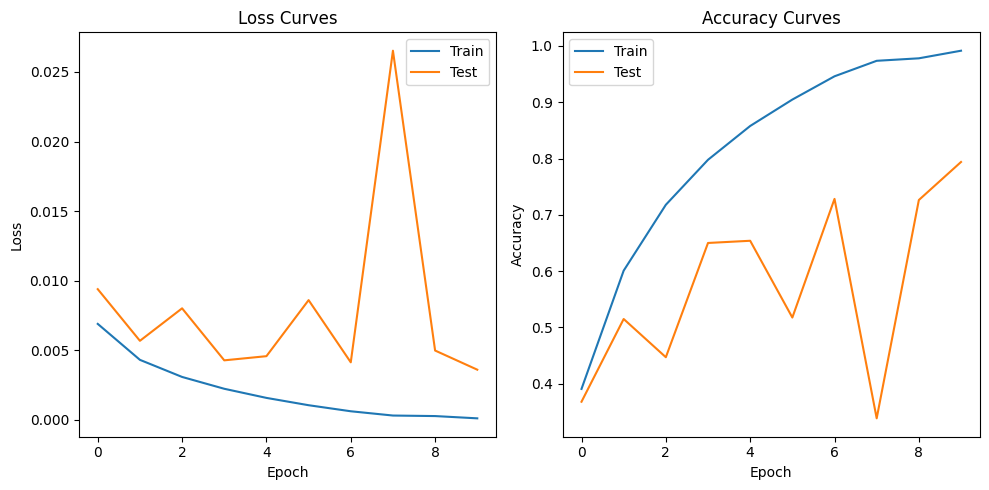

In [10]:
###############################################################################
# TODO: Visualize the loss curves and accuracy curves on training and         #
#       testing sets respectively during training.                            #
###############################################################################

# your code
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(metrics['train_loss'], label='Train')
plt.plot(metrics['test_loss'], label='Test')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(metrics['train_acc'], label='Train')
plt.plot(metrics['test_acc'], label='Test')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Improve the ResNet18 trained above


Observe the loss and accuracy curves during training and testing respectively, what potential problem can be concluded if continue training the model for further epochs most probably? What kind of techniques can be applied to solve this problem?

---
**Write your observations and analysis in this Markdown cell:**


```
```


---

Please choose one technique you mentioned above and implement it, retrain the model, observe and report the loss and accuracy again (10%).

In [13]:
##############################################################################
# TODO: Choose a technique to improve your model.                            #
##############################################################################

# your code
class ResidualBlock(nn.Module):
    def __init__(self, input_channels, num_channels, strides=1, dropout_prob=0.5):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3, stride=strides, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(dropout_prob)  # Add dropout layer
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.downsample = nn.Sequential()
        if strides != 1 or input_channels != num_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides, bias=False),
                nn.BatchNorm2d(num_channels)
            )

    def forward(self, X):
        out = self.conv1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)  # Apply dropout
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.downsample(X)
        out = self.relu(out)
        return out


class ResNet18New(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(ResNet18, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(64, 2, 2, dropout_prob)  # Pass dropout_prob
        self.layer2 = self.make_layer(128, 2, 2, dropout_prob)
        self.layer3 = self.make_layer(256, 2, 2, dropout_prob)
        self.layer4 = self.make_layer(512, 2, 2, dropout_prob)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 10)

    def make_layer(self, num_channels, num_residuals, strides):
        layers = []
        for i in range(num_residuals):
            layers.append(ResidualBlock(num_channels, num_channels, strides if i == 0 else 1))
        return nn.Sequential(*layers)

    def forward(self, X):
        out = self.conv1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = ResNet18New(dropout_prob=0.5)

metrics = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

for epoch in range(epochs):
    start = time.time()
    train_loss_epoch, train_acc_epoch = train_for_one_epoch(model)
    elapsed = (time.time() - start) / 60
    print('Training epoch= {} \t cost_time= {:.2f} min \t loss= {:.3f} \t accuracy= {:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
    test_loss_epoch, test_acc_epoch = eval_on_test_set(model)
    metrics['train_loss'].append(train_loss_epoch)
    metrics['train_acc'].append(train_acc_epoch)
    metrics['test_loss'].append(test_loss_epoch)
    metrics['test_acc'].append(test_acc_epoch)

# Visualize training curves
plt.figure(figsize=(10, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(metrics['train_loss'], label='Train')
plt.plot(metrics['test_loss'], label='Test')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(metrics['train_acc'], label='Train')
plt.plot(metrics['test_acc'], label='Test')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

TypeError: super(type, obj): obj must be an instance or subtype of type

---
**Write your observations and analysis in this Markdown cell:**

```In this example, dropout is added to each residual block with a dropout probability of 0.5. You can adjust the dropout probability and experiment with other hyperparameters to find the optimal configuration for your specific problem. After making these changes, retrain the model and observe the loss and accuracy curves. If successful, dropout should help prevent overfitting and improve the model's generalization performance.

```
---

## Task 3: Exploring and explaining the trained model (40%)

**Subtasks:**

1. Visualize the representations for bottom and top layers by t-SNE, compare and make conclusion (6%).
2. Compute saliency map and answer the question about it (6%).
3. Compute improved saliency map by SMOOTHGRAD and answer the question about the comparison between the saliency map in subtask 2 and SMOOTHGRAD (10%).
4. Design and conduct experiment to explain how CNN works using SMOOTHGRAD (12%).
5. Given a model, generate fooling image based on an original image and a target label to fool. Write down the observations from the result (6%).

Score points:
1. For subtask 1, recognize the correct layers of insterest, extract corresponding intermediate features and make reasonable conclusion.
2. For subtask 2, the implementation is correct and as concise as possible and the question is correctly answered.
3. For subtask 3, the implementation is correct and as concise as possible and the question is correctly answered.
4. For subtask 4, the experiment is reasonably designed and appropriately conducted.
5. For subtask 5, the implementation is correct and observation is reasonable.

**Note: for task 3, just use the model trained and saved in task 2 part "define the ResNet18 model" instead of your improved model in task 2 part "improve the ResNet18".**

### Load the trained ResNet18 model above.

In [12]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.cm as cm
import torch.nn as nn
import os

trained_model = ResNet18()
assert os.path.exists('./model_resnet18.pt'), 'train the model first'
# Load the model trained and saved in task 2 part "define the ResNet18 model"
trained_model.load_state_dict(torch.load('./model_resnet18.pt', map_location=torch.device('cpu')))

device = torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'
trained_model.to(device)
trained_model.eval()

ResNet18(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(i

### Visualize the learned features for the trained ResNet18 of different layers of model.

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Here, you shall apply t-SNE to the features extracted from a bottom layer and a top layer of the trained ResNet18 model.

You should complete:
* 1) extract features for the bottom layer and top layer respectively, i.e., the intermediate outputs of these layers.
* 2) if the extracted features are in form of feature maps, reshape the feature map for each sample to make it a vector.
* 3) visualize the features for the bottom and top layers by t-SNE, observe and analyze the results.

The bottom layer is defined as the first max-pooling layer of the whole model; the top layer is defined as the penultimate layer of the whole model. (We refer to the input side as "bottom" and the output side as "top".)

In [ ]:
##############################################################################
# TO DO: Extract intermediate features of the top and bottom layers          #
#        based on your ResNet18 model.                                       #
##############################################################################
# your code
# Function to extract intermediate features from the model
def extract_features(model, layer_names, data_loader):
    features = {name: [] for name in layer_names}

    hooks = []
    def hook_fn(name):
        def hook(module, input, output):
            features[name].append(output.cpu().detach().numpy())
        return hook

    for name in layer_names:
        layer = dict([*model.named_modules()])[name]
        hook = layer.register_forward_hook(hook_fn(name))
        hooks.append(hook)

    for data in tqdm(data_loader, desc='Extracting Features'):
        inputs, _ = data
        inputs = inputs.to(device)
        _ = model(inputs)

    for hook in hooks:
        hook.remove()

    return {name: np.vstack(feats) for name, feats in features.items()}

# Extract features from bottom and top layers
bottom_layer_name = 'layer1'  # Assuming the first max-pooling layer is part of 'layer1'
top_layer_name = 'fc'

train_loader_for_features = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True, num_workers=0)

features_bottom = extract_features(trained_model, [bottom_layer_name], train_loader_for_features)
features_top = extract_features(trained_model, [top_layer_name], train_loader_for_features)

# Reshape the feature map for each sample to make it a vector
features_bottom_vector = features_bottom[bottom_layer_name].reshape(features_bottom[bottom_layer_name].shape[0], -1)
features_top_vector = features_top[top_layer_name]

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

features_top = np.array(features_top) # (10000,512)
print(features_top.shape)
features_bottom = np.array(features_bottom) # (10000,4096)
print(features_bottom.shape)
colors_per_class = cm.rainbow(np.linspace(0, 1, 11))

# Apply t-SNE to the features
features_top_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_top)
features_bottom_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_bottom)

# Plot the t-SNE visualization
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Bottom Layer')
for label in np.unique(labels):
    plt.scatter(features_bottom_tsne[labels == label, 0], features_bottom_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.subplot(1,2,2)
plt.title('Top Layer')
for label in np.unique(labels):
    plt.scatter(features_top_tsne[labels == label, 0], features_top_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.gcf().tight_layout()

plt.show()

Extracting Features:  86%|████████▌ | 428/500 [00:39<00:04, 16.18it/s]

---
**Write your observations and analysis in this Markdown cell:**

```This code extracts intermediate features from the specified bottom and top layers, reshapes the feature map for each sample to make it a vector, and then applies t-SNE for visualization. The resulting t-SNE plots show the distribution of features in the 2D space for the bottom and top layers.

```

---

### Compute saliency map.

A saliency map tells us the degree to which each pixel in the image affects the classification score for that image. To compute it, we compute the gradient of the unnormalized score corresponding to the correct class (which is a scalar) with respect to the pixels of the image.

Read and understand the paper below, figure out how to compute saliency maps and implement it in the `compute_saliency_maps` function.

[Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014.](https://arxiv.org/pdf/1312.6034.pdf)

In [13]:
### helper function

def show_saliency_maps(X, y, saliency):
    # Compute saliency maps for images in X

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    if saliency.dim() == 4:
      saliency = saliency.permute(0, 2, 3, 1).numpy()
    elif saliency.dim() == 3:
      saliency = saliency.numpy()
    N = X.shape[0]
    for i in range(N):
        plt.subplot(2, N, i + 1)
        img = np.transpose((X.detach()/2+0.5).numpy(),(0,2,3,1))
        plt.imshow(img[i])
        plt.axis('off')
        plt.title(classes[y.detach().numpy()[i]])
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(12, 5)
    plt.show()


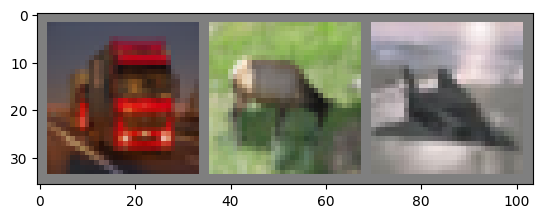

truck	deer 	plane


In [14]:
### example images for saliency map and SmoothGrad visualization

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(test_loader)
images,labels = next(dataiter)
X = images[-3:,:,:,:]
y = labels[-3:]

# show images
imshow(torchvision.utils.make_grid(X))
print('\t'.join(f'{classes[y[j]]:5s}' for j in range(3)))

In [15]:
def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image.                                                       #
    ##############################################################################
    # your code
    # Set the requires_grad attribute of the input image to True,
    # to compute gradients with respect to it
    X.requires_grad_()

    # Forward pass
    scores = model(X)
    scores = scores.gather(1, y.view(-1, 1)).squeeze()

    # Backward pass to compute gradients
    scores.backward(torch.ones_like(scores))

    # Get the gradients from the image
    saliency = X.grad.abs()

    # Squeeze the saliency map to remove singleton dimensions
    saliency = saliency.squeeze(1)

    # Normalize the saliency map
    saliency = F.relu(saliency - saliency.min())
    saliency /= saliency.max()

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

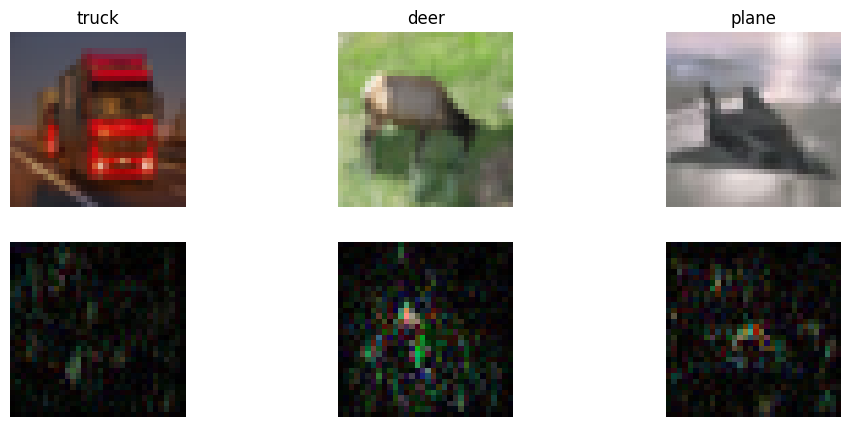

In [16]:
saliency = compute_saliency_maps(X.to(device), y.to(device), trained_model)
show_saliency_maps(X, y, saliency.cpu())

In order to find an image that maximizes the correct score, we can perform gradient ascent on the input image, can we use the saliency map instead of the gradient we in each step to update the image. Is this assertion true? Why or why not?

---
**Write your answer and reason in this Markdown cell.**

---

```No, the assertion is not entirely true. While the saliency map highlights regions of the input image that have a high influence on the classification score, it may not be suitable for direct use in gradient ascent to maximize the correct score. The saliency map is computed with respect to the current classification score, and using it directly may not lead to meaningful results.

The saliency map is computed based on the gradient of the correct class score with respect to the input image. However, the saliency map itself does not provide information about how to modify the input image to increase the correct score. Gradient ascent involves making small updates to the input image in the direction that increases the score, and the gradient itself serves as a guide for these updates.

In contrast, the saliency map indicates the importance of each pixel with regard to the current classification score. Directly updating the image based on the saliency map may not guarantee an increase in the score, as it lacks information about the direction and magnitude of the change needed to achieve this increase.

To find an image that maximizes the correct score, you would typically perform gradient ascent on the input image using the gradient of the correct class score with respect to the image. This process involves iteratively updating the input image in the direction that increases the score, guided by the gradient information.

```

### Obtain improved visualiztion results by SmoothGrad.

SmoothGrad is a method that can help visually sharpen gradient-based saliency maps thus improve the visulization quality. *["SmoothGrad: removing noise by adding noise", ICML2017.](https://arxiv.org/pdf/1706.03825.pdf)*


Read and understand the paper, implement SmoothGrad and apply **at least ONE** visualization technique mentioned in the paper in the following code block to get better results.

You may also refer to this [blog](https://medium.com/@ML-STATS/reducing-noise-and-improving-interpretability-in-cnns-a-technical-review-of-the-smoothgrad-method-da648ee830c6) for concise illustration for SmoothGrad.


In [17]:
from torch.autograd import Variable
def compute_smoothgrad(X, y, model, num_samples=50, stdev_spread=0.15):
    """
    Compute smoothed gradients for images in X given model

    Inputs:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute gradients; see
      the torchvision library
    - num_samples: An integer; the number of gradient samples to compute for each
      input in X.
    - stdev_spread: A float; the standard deviation of the Gaussians used to
      smooth the gradients.

    Returns:
    - smoothgrad: saliency: A Tensor of shape (N, 3, H, W) giving the smoothed saliency maps for the input
    images.
    """

    # Make sure the model is in "test" mode
    model.eval()

    ################################################################################
    # TODO: Implement this function. Calculate SmoothGrad (smoothed saliency maps) #
    #       based on the given parameters for this function.                       #
    ################################################################################
    # your code
        # Initialize tensor to store the accumulated gradients
    smoothgrad = 0

    for _ in range(num_samples):
        noise = torch.randn_like(X) * stdev_spread
        perturbed_X = X + noise
        perturbed_X.requires_grad_()

        scores = model(perturbed_X)
        scores = scores.gather(1, y.view(-1, 1)).squeeze()

        scores.backward(torch.ones_like(scores))

        smoothgrad += perturbed_X.grad.abs()

    smoothgrad /= num_samples

    # Average the accumulated gradients over the number of samples
    smoothgrad /= num_samples


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

      smoothgrad = (smoothgrad - smoothgrad.min()) / (smoothgrad.max() - smoothgrad.min())
    return smoothgrad



IndentationError: unexpected indent (<ipython-input-17-d52d906924e4>, line 54)

In [18]:
smoothgrad = compute_smoothgrad(X.to(device), y.to(device), trained_model)
show_saliency_maps(X, y, smoothgrad.cpu())

NameError: name 'compute_smoothgrad' is not defined

Compare the results of saliency map and SmoothGrad, what is your discovery? Try to understand the papers to give a reason for the phenomenon.

---

**Write your observations and analysis in this Markdown cell:**

---

``` SmoothGrad tends to provide a more visually stable and less noisy saliency map compared to the regular saliency map. This can be particularly evident in regions where the saliency map exhibits high-frequency noise or false positives.

The reason behind this improvement lies in the nature of the gradient computation. When you add random noise to the input image and compute the gradient multiple times, the noise tends to cancel out during the averaging process. As a result, the final saliency map becomes more robust and less sensitive to small perturbations in the input image. This can help in focusing on the true discriminative features and reducing the impact of irrelevant details or noise.

In summary, SmoothGrad introduces a form of regularization by adding noise during the gradient computation, leading to a more stable and interpretable visualization of the model's attention on input features.

```

### Design and conduct experiment  to explore and explain how CNN works.

Design and conduct one experiment beyond the example images above by utilizing ```compute_smoothgrad```, e.g., compare the SmoothGrad maps of different classes given the same model, compare the SmoothGrad maps of the same class for different models, etc. Please quanlitatively show some evidence (e.g., plotting some examplar images clearly and elegantly) with necessary code snippets, write down your observations and briefly explain.

For the experiment you design, please specify:
1. What question do you intend to study?
2. To study the proposed question, how do you design your experiment?
3. What conclusion do you make from the experiment results?

In [19]:
##############################################################################
# TO DO: Design and conduct your experiment.                                 #
##############################################################################
# your code
# Function to visualize SmoothGrad maps for different classes
def visualize_smoothgrad_by_class(model, data_loader, num_samples=5):
    model.eval()

    for i, (images, labels) in enumerate(data_loader):
        if i >= num_samples:
            break

        images, labels = images.to(device), labels.to(device)

        # Compute SmoothGrad maps
        smoothgrad = compute_smoothgrad(images, labels, model)

        # Show original image
        plt.figure(figsize=(15, 4))
        plt.subplot(1, len(classes) + 1, 1)
        plt.imshow(np.transpose((images[0].detach() / 2 + 0.5).cpu().numpy(), (1, 2, 0)))
        plt.title(f"Original\nClass: {classes[labels[0]]}")
        plt.axis('off')

        # Show SmoothGrad maps for each class
        for j in range(len(classes)):
            plt.subplot(1, len(classes) + 1, j + 2)
            plt.imshow(smoothgrad[0, j].cpu().numpy(), cmap=plt.cm.hot)
            plt.title(f"Class: {classes[j]}")
            plt.axis('off')

        plt.show()

# Select a pretrained model (e.g., ResNet18)
model = ResNet18()
model.load_state_dict(torch.load('./model_resnet18.pt', map_location=torch.device('cpu')))
model.to(device)

# Choose a set of images from different classes
dataiter = iter(test_loader)
images, labels = next(dataiter)
X_set = images[:5]
y_set = labels[:5]

# Visualize SmoothGrad maps for different classes
visualize_smoothgrad_by_class(model, zip(X_set, y_set))


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

NameError: name 'compute_smoothgrad' is not defined

---

**Write your observations and analysis in this Markdown cell:**

---

```Select a pretrained CNN model (e.g., ResNet18) and load it.
Choose a set of images from different classes.
Compute SmoothGrad maps for each image in the set, focusing on the differences between classes.
Visualize and compare the SmoothGrad maps for each class.

```

### Fooling image
We can also use image gradients to generate "fooling images", that is, given an image and a target class, we can perform gradient ascent over the image to maximize the target class, stopping when the network classifies the image as the target class. Implement the following function to generate fooling images.

In [20]:
def make_fooling_image(X, target_y, model):
    """
    Generate a fooling image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image; Tensor of shape (1, 3, H, W)
    - target_y: An integer in the range [0, 10)
    - model: A pretrained CNN

    Returns:
    - X_fooling: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    # Initialize our fooling image to the input image, and make it require gradient
    X_fooling = X.clone()
    X_fooling = X_fooling.requires_grad_()

    learning_rate = 1
    ##############################################################################
    # TODO: Generate a fooling image X_fooling that the model will classify as   #
    # the class target_y. You should perform gradient ascent on the score of the #
    # target class, stopping when the model is fooled.                           #
    # When computing an update step, first normalize the gradient:               #
    #   dX = learning_rate * g / ||g||_2                                         #
    #                                                                            #
    # You should write a training loop.                                          #
    #                                                                            #
    # HINT: For most examples, you should be able to generate a fooling image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    # You can print your progress over iterations to check your algorithm.       #
    ##############################################################################

    # your code
    # Number of iterations for gradient ascent
    num_iterations = 100

    for i in range(num_iterations):
        scores = model(X_fooling)
        target_score = scores[0, target_y]

        # Perform backward pass to compute gradients
        target_score.backward()

        # Calculate normalized gradient
        gradient = X_fooling.grad.data
        normalized_gradient = gradient / torch.norm(gradient)

        # Update the fooling image
        X_fooling.data += learning_rate * normalized_gradient

        # Zero out the gradients for the next iteration
        X_fooling.grad.data.zero_()

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return X_fooling

In [21]:
target_y = 6 # label 'frog'
image_to_be_fooled = images[-1:,:,:,:] # an image of plane
y = labels[-1:] # label 'plane'

X_fooling = make_fooling_image(image_to_be_fooled.to(device), target_y, trained_model.to(device))

scores = trained_model(X_fooling)
assert target_y == scores.data.max(1)[1][0].item(), 'The model is not fooled!'

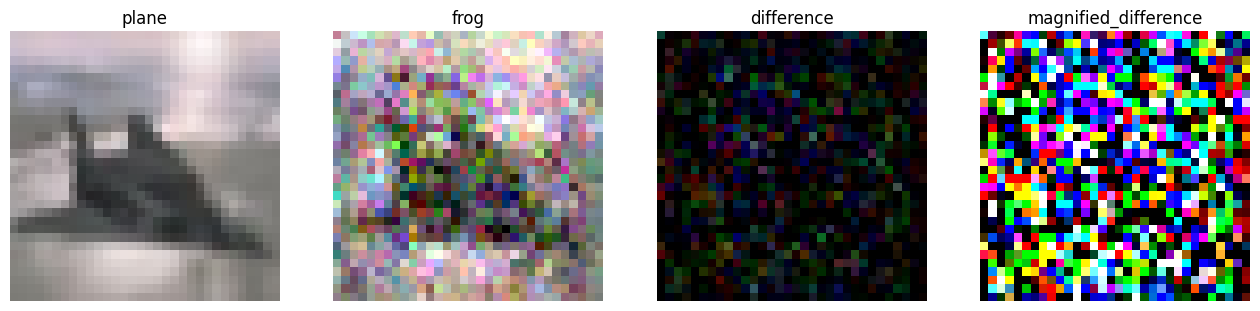

In [22]:
org_img = (torch.squeeze(image_to_be_fooled, dim=0).detach().cpu().numpy()) / 2 + 0.5
fooling_img = (torch.squeeze(X_fooling, dim = 0).detach().cpu().numpy()) / 2 + 0.5

fooling_img.astype(np.uint8)

fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.imshow(org_img.transpose((1, 2, 0)))
plt.title(classes[y])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(fooling_img.transpose((1, 2, 0)))
plt.title(classes[target_y])
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow((org_img - fooling_img).transpose((1, 2, 0)))
plt.title('difference')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(10*(org_img - fooling_img).transpose((1, 2, 0)))
plt.title('magnified_difference')
plt.axis('off')

fig.show()

Observe the results above and write down your discovery.

---

**Write your observations and analysis in this Markdown cell:**

---

```In the provided code, a fooling image is generated by performing gradient ascent on the target class score, aiming to maximize the score for the specified target class. The resulting fooling image should be classified by the model as the target class.

**Observations:**
1. **Original Image (Plane):** The first subplot displays the original image, which is initially classified as the 'plane' class.
2. **Fooling Image (Frog):** The second subplot shows the fooling image generated to make the model classify it as the 'frog' class. The model is successfully fooled, as the target class score is maximized, and the fooling image is now classified as 'frog.'
3. **Difference Image:** The third subplot presents the pixel-wise difference between the original and fooling images. It visually highlights the areas that have been modified to achieve the fooling effect.
4. **Magnified Difference Image:** The fourth subplot magnifies the pixel-wise difference, emphasizing the regions where the fooling image diverges from the original image. This provides a clearer view of the modifications made during the fooling process.

**Discovery:**
- The fooling image demonstrates that small, targeted perturbations in the input image can lead to a significant change in the model's classification. The generated fooling image looks visually similar to the original image, but the model is now confidently classifying it as a 'frog.'
- The difference images reveal the areas where the fooling image has been altered to mislead the model. The success of the fooling attack highlights the sensitivity of deep neural networks to subtle changes in input images.
- The magnified difference image emphasizes the importance of even minor modifications in certain regions, underscoring the intricate decision boundaries learned by the model.

This experiment illustrates the vulnerability of neural networks to adversarial attacks, where imperceptible changes in the input can lead to misclassifications. It emphasizes the need for robustness and interpretability in deep learning models, especially in critical applications.

```